 Final dataset created with clean column names
Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'order_amount',
       'restaurant_name', 'user_name', 'city', 'membership',
       'restaurant_name_order', 'cuisine', 'rating'],
      dtype='object')


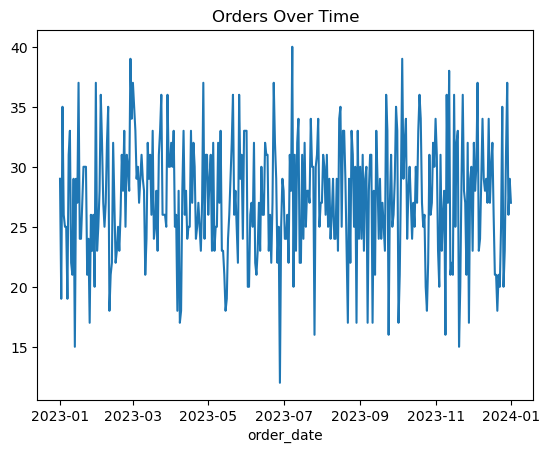


 Top Cities:
city
Bangalore    2751
Chennai      2469
Pune         2430
Hyderabad    2350
Name: count, dtype: int64

 Top Cuisines:
cuisine
Mexican    2581
Italian    2532
Indian     2469
Chinese    2418
Name: count, dtype: int64

 Membership vs Avg Order Value:
membership
Gold       797.145556
Regular    805.158434
Name: order_amount, dtype: float64

 Top Restaurants by Revenue:
restaurant_name
Spice Foods Non-Veg                48616.39
Annapurna Kitchen North Indian     46462.08
Swagath Cafe Multicuisine          45821.74
Hotel Curry House North Indian     45091.67
Amma Biryani North Indian          44169.33
Swagath Kitchen North Indian       42727.16
Darbar Eatery Family Restaurant    41742.61
Sai Biryani Non-Veg                40942.97
Amma Cafe South Indian             40352.80
Sai Restaurant Non-Veg             40190.74
Name: order_amount, dtype: float64

Peak Order Hours:
hour
0    10000
Name: count, dtype: int64


In [13]:
import pandas as pd
import json
import sqlite3
import matplotlib.pyplot as plt

# -----------------------------
# 1) LOAD ALL THREE FILES
# -----------------------------
orders = pd.read_csv('orders.csv')

with open('users.json') as f:
    users = pd.DataFrame(json.load(f))

conn = sqlite3.connect(':memory:')
cursor = conn.cursor()
with open('restaurants.sql', 'r') as f:
    cursor.executescript(f.read())

restaurants = pd.read_sql_query("SELECT * FROM restaurants;", conn)

# -----------------------------
# 2) MERGE (LEFT JOINS)
# -----------------------------
merged = orders.merge(users, on='user_id', how='left')
final_df = merged.merge(restaurants, on='restaurant_id', how='left')

# -----------------------------
# 3) RENAME COLUMNS (CLEAN TITLE
# -----------------------------
final_df.rename(columns={
    'restaurant_name_x': 'restaurant_name',
    'restaurant_name_y': 'restaurant_name_order',
    'name': 'user_name',
    'total_amount': 'order_amount'
}, inplace=True)

# -----------------------------
# 4) DATE FORMAT
# -----------------------------
final_df['order_date'] = pd.to_datetime(
    final_df['order_date'],
    format='%d-%m-%Y',
    errors='coerce'
)

# -----------------------------
# 5) SAVE FINAL DATASET
# -----------------------------
final_df.to_csv('final_food_delivery_dataset.csv', index=False)

print(" Final dataset created with clean column names")
print(final_df.columns)

# -----------------------------
# 6) BASIC ANALYSIS
# -----------------------------

plt.figure()
final_df.groupby(final_df['order_date'].dt.date).size().plot(title='Orders Over Time')
plt.show()

print("\n Top Cities:")
print(final_df['city'].value_counts().head(10))

print("\n Top Cuisines:")
print(final_df['cuisine'].value_counts().head(10))

print("\n Membership vs Avg Order Value:")
print(final_df.groupby('membership')['order_amount'].mean())

print("\n Top Restaurants by Revenue:")
print(
    final_df.groupby('restaurant_name')['order_amount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

if final_df['order_date'].notna().any():
    final_df['hour'] = final_df['order_date'].dt.hour
    print("\nPeak Order Hours:")
    print(final_df['hour'].value_counts().sort_index())


In [9]:
#1
import pandas as pd

df = pd.read_csv('final_food_delivery_dataset.csv')

result = (
    df[df['membership'] == 'Gold']
    .groupby('city')['order_amount']
    .sum()
    .sort_values(ascending=False)
)

print(result)
print("\nCity with highest Gold member revenue:", result.index[0])


city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: order_amount, dtype: float64

City with highest Gold member revenue: Chennai


In [11]:
#2
import pandas as pd

df = pd.read_csv('final_food_delivery_dataset.csv')

result = (
    df.groupby('cuisine')['order_amount']
    .mean()
    .sort_values(ascending=False)
)

print(result)
print("\nHighest average order value cuisine:", result.index[0])


cuisine
Mexican    808.021344
Italian    799.448578
Indian     798.466011
Chinese    798.389020
Name: order_amount, dtype: float64

Highest average order value cuisine: Mexican
